In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('GLA01_ready_to_PBI_Updated (1).csv', delimiter=";")

In [3]:
df_bck = df.copy()

# Alarm explotation

## Data Features

In [4]:
df

,rounding,Nr per 10,date,unique_alarms_date,MsgNr,DateTime,Ms,State,dt,Plant,...,weekday,Total_alarms_of_date,alarms_by_date_bins,good_bad_outlier,is_valid,is_weekend,Area,Response,Year-Month,Year-Week
0,2022-01-01 01:50:00,3,2022-01-01,2,35001,2022-01-01 01:59:04,402,1,0,KÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¼hlwasser,...,5,20,0,good_day,valid,is_weekend,NaN,Unacknowledged or Fleeting,2021-01,2021-52
1,2022-01-01 01:50:00,3,2022-01-01,2,35001,2022-01-01 01:59:27,403,1,0,KÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¼hlwasser,...,5,20,0,good_day,valid,is_weekend,NaN,Unacknowledged or Fleeting,2021-01,2021-52
2,2022-01-01 01:50:00,3,2022-01-01,2,35001,2022-01-01 01:59:45,377,1,0,KÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¼hlwasser,...,5,20,0,good_day,valid,is_weekend,NaN,Unacknowledged or Fleeting,2021-01,2021-52
3,2022-01-01 02:00:00,1,2022-01-01,2,35001,2022-01-01 02:00:23,398,1,0,KÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¼hlwasser,...,5,20,0,good_day,valid,is_weekend,NaN,Unacknowledged or Fleeting,2021-01,2021-52
4,2022-01-01 02:10:00,1,2022-01-01,2,12038,2022-01-01 02:12:55,450,1,0,SchmÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¤lzoel,...,5,20,0,good_day,valid,is_weekend,NaN,Acknowledged,2021-01,2021-52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819778,2023-01-31 23:50:00,16,2023-01-31,339,25017,2023-01-31 23:56:05,313,1,0,Entstapler,...,1,2009,2000,good_day,valid,is_weekday,NaN,NaN,2023-01,2023-05
819779,2023-01-31 23:50:00,16,2023-01-31,339,6292,2023-01-31 23:57:58,194,1,0,SK Filter,...,1,2009,2000,good_day,valid,is_weekday,NaN,Acknowledged,2023-01,2023-05
819780,2023-01-31 23:50:00,16,2023-01-31,339,6292,2023-01-31 23:58:21,740,1,0,SK Filter,...,1,2009,2000,good_day,valid,is_weekday,NaN,Acknowledged,2023-01,2023-05
819781,2023-01-31 23:50:00,16,2023-01-31,339,6292,2023-01-31 23:58:30,194,1,0,SK Filter,...,1,2009,2000,good_day,valid,is_weekday,NaN,Unacknowledged or Fleeting,2023-01,2023-05


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819783 entries, 0 to 819782
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   rounding              819783 non-null  object
 1   Nr per 10             819783 non-null  int64 
 2   date                  819783 non-null  object
 3   unique_alarms_date    819783 non-null  int64 
 4   MsgNr                 819783 non-null  int64 
 5   DateTime              819783 non-null  object
 6   Ms                    819783 non-null  int64 
 7   State                 819783 non-null  int64 
 8   dt                    819783 non-null  int64 
 9   Plant                 819783 non-null  object
 10  Component             326373 non-null  object
 11  Text                  815983 non-null  object
 12  Type                  819783 non-null  object
 13  Priority              819783 non-null  int64 
 14  Cat                   800470 non-null  object
 15  index            

In [17]:
df[df['MsgNr'] == 6336]

,rounding,Nr per 10,date,unique_alarms_date,MsgNr,DateTime,Ms,State,dt,Plant,...,weekday,Total_alarms_of_date,alarms_by_date_bins,good_bad_outlier,is_valid,is_weekend,Area,Response,Year-Month,Year-Week


In [13]:
data.Text.unique()

array(['Hochdruckanlage Buffertank Wasserniveau zu Niedrig',
       'Hochdruckpumpe 3 Temperatur zu Hoch',
       'Hochdruckpumpe 2 Temperatur zu Hoch',
       'Sammelkammer Hochdruckreinigung Linie 1 Kein Wasserfluss',
       'Hochdruckanlage Buffertank Wasserniveau zu Hoch',
       'Abfalltransportanlage  steht',
       'Sektion 2 Sammelkammer Hochdruckreinigung TÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â¼rschalter',
       'Sektion 2 Sammelkammer Hochdruckreinigung Türschalter',
       'Sektion 2 Sammelkammer Hochdruckreinigung TÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â¼rschalter',
       'Hochdruckpumpe 2 Reparaturschalter',
       'Hochdruckanlage Position einer der Ventiele Falsch',
       'Sektion 2 Sammelkammer Hochdruckreinigung TÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â¼rschalter',
       'Hochdruchanlage Buffertank Wassertemperatur z

In [9]:
df.Plant.unique()

array(['KÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â¼hlwasser',
       'SchmÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â¤lzoel',
       'Laseranlage', 'Regenw. UV88', 'Entstapler', 'Grossformatstapler',
       'Tensiontech', 'Abfalltransport', 'Briquette_B1', 'SK Filter',
       'Reku L1', 'Emissionsmessung', 'Grenzebach', 'PStapler UV138',
       'T-Spinner', 'Granulat', 'Granulat Sack Palettierung',
       'L-Ende UV136', 'ACON', 'Recycling', 'Chargierung', 'Briquette_B2',
       'BiMi-Lager',
       'HÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â¤rteofen',
       'HaRo', 'Besch. Hochb.', 'Kompressoren', 'Sammelkam.', 'Georock',
       'Abfallbeh. UV42', 'Transportanlage', 'Härteofen',
       'HÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â¤rteofen',
       'Kühlwasser',
       'KÃ

In [26]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

## Alarm time distribution

In [27]:
#creating dataframe which distributes the number of alarms activated per month
events = pd.DataFrame(df.groupby(df['DateTime'].dt.strftime('%Y-%m'))['DateTime'].count()).rename(columns={'DateTime': 'times'})
events

,times
DateTime,
2022-01,63603
2022-02,69113
2022-03,61478
2022-04,57880
2022-05,57625
2022-06,60979
2022-07,69793
2022-08,82465
2022-09,62976


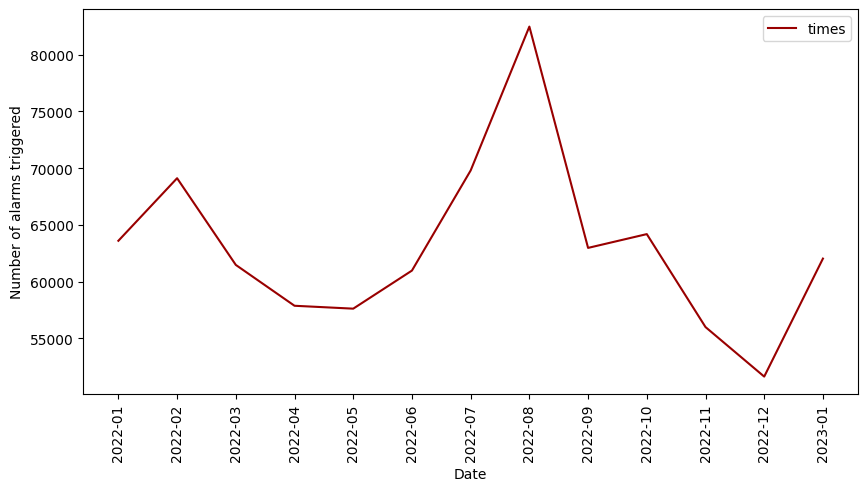

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.lineplot(data=events, palette=['#990000'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of alarms triggered')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [29]:
# Creating a new dataframe that counts how many times each unique alarm ID has been triggered
alarms = pd.DataFrame(df.groupby(['MsgNr'])['MsgNr'].count()).rename(columns={'MsgNr': 'occurrences'}).sort_values(by = ['occurrences'], ascending = False)
alarms.head()

,occurrences
MsgNr,
6462,18299
27281,17980
32019,17234
3419,15445
37148,15296


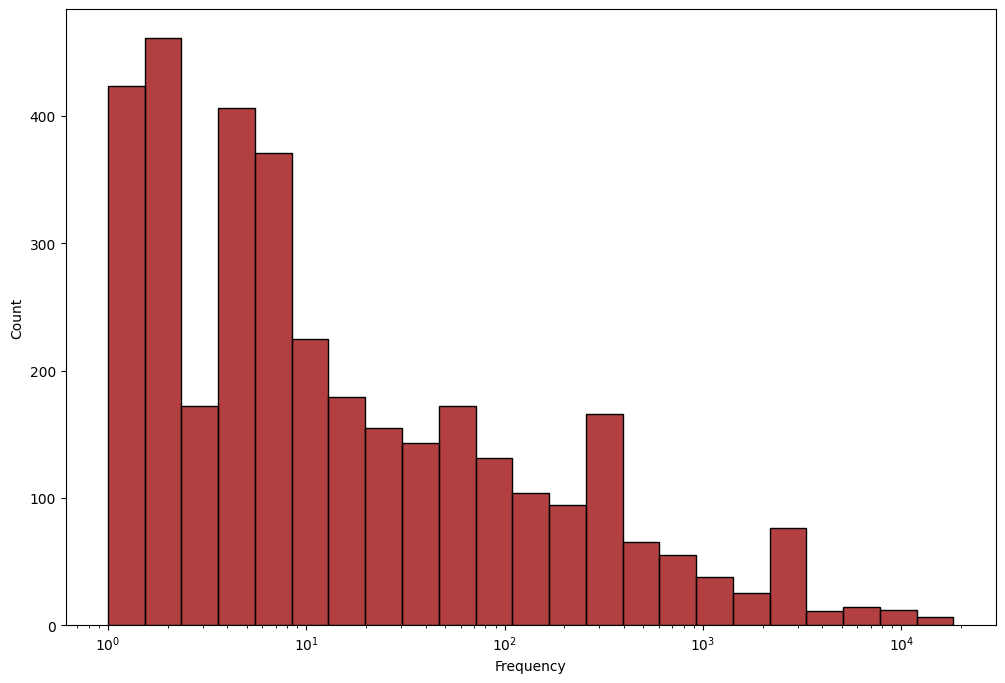

In [30]:
# Histogram on the frequncy of number of activation per alarms
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=alarms.reset_index(), x='occurrences', ax=ax, color='#990000', log_scale=True)
ax.set_xlabel('Frequency')
ax.set_ylabel('Count')
plt.show()

In [31]:
print(f'There are {alarms.shape[0]} unique alarms, that have been triggered {alarms.occurrences.sum()} times ')

There are 3505 unique alarms, that have been triggered 819783 times 


## Alarm reduction of occurences

In [32]:
#Calculating the mean value and standard deviation of how many times one alarm is activated
mean = np.mean(alarms)
std_dev = np.std(alarms)
print('The mean value is: ', mean.occurrences, ' and the st deviation: ', std_dev.occurrences)

The mean value is:  233.8895863052782  and the st deviation:  1044.211599922276


c:\Users\manda\OneDrive - ROCKWOOL Group\Documents\Mthesis\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [33]:
#Creating three threshold values, which are X times the standard deviation
list = [1, 2, 3]
threshold = [(mean.occurrences + i*std_dev.occurrences) for i in list]

In [34]:
#Creating the mask which says if the añlarm is above the threeshold or not
mask = [(alarms >= x) for x in threshold]

In [35]:
# Counting for the three thresohlds how many alarms are True and False 
del list
data_inverse = [alarms[~item].occurrences.sum() for item in mask]
df = [alarms[item].occurrences.sum() for item in mask]
pairs = list(zip(data_inverse, df))
pairs
    

[(230370.0, 589413.0), (301434.0, 518349.0), (493006.0, 326777.0)]

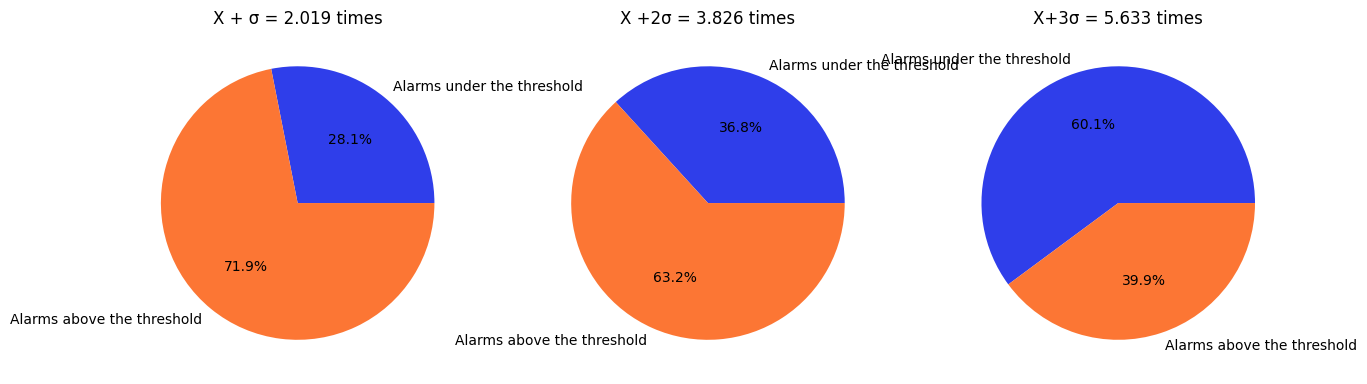

In [36]:
#Plotting alarms withing and outside the threshold values
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
labels = ['Alarms under the threshold', 'Alarms above the threshold']
colors = ['#2F3EEA', '#FC7634']

ax1.pie(pairs[0], labels=labels, colors=colors, autopct='%1.1f%%')
ax1.set_title("X + σ = 2.019 times")

ax2.pie(pairs[1], labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title("X +2σ = 3.826 times")

ax3.pie(pairs[2], labels=labels, colors=colors, autopct='%1.1f%%')
ax3.set_title("X+3σ = 5.633 times")

plt.show()

In [41]:
mask[2]

,occurrences
MsgNr,
6462,True
27281,True
32019,True
3419,True
37148,True
...,...
33378,False
27275,False
27274,False


In [42]:
# Now it is selected the first option taking into consideration the 64.2% of alarms
df = pd.DataFrame(alarms[mask[1]].occurrences.dropna())

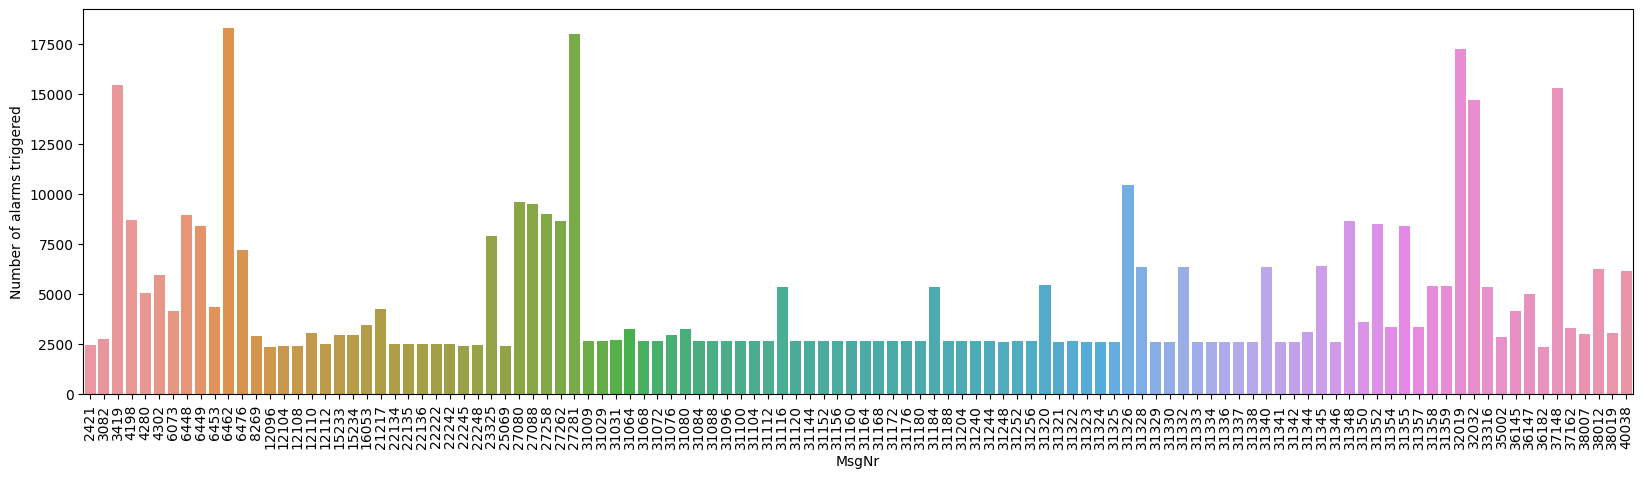

In [43]:
# Plot of the most triggered alarms
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.barplot(data=df, x=df.index, y="occurrences")
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Number of alarms triggered')
plt.show()

In [44]:
relevant_alarms = df.index.tolist()
print(f'there are {len(relevant_alarms)} alarms which represents the majority part of the events')

there are 112 alarms which represents the majority part of the events


In [45]:
#selecting from the original dataset just the selected alarms
df = df_bck[df_bck['MsgNr'].isin(relevant_alarms)]

## Components

In [46]:
#Gourping by component (winCC) and plant
grouped = df.groupby(['Component', 'Plant']).size().reset_index().rename(columns={0:'times'})
grouped

,Component,Plant,times
0,.10-62.2U6,HÃÂ¤rteofen,2984
1,.10-62.2U6,Härteofen,2984
2,.10-63.21U8,Sammelkam.,2899
3,.10-63.27A3,Abfallbeh. UV42,7927
4,10-61.47Y6,BiMi-Lager,5385
5,4-2. 4A2,Tensiontech,19106
6,4-2.103S1,Tensiontech,17980
7,4-2.104A2,Tensiontech,8988
8,4-2.114S2,Tensiontech,8668
9,4.1-1K1,PStapler UV138,2543


In [47]:
# The biggest part of alarms are caused by the curing oven
sum_scores = grouped.loc[grouped['Plant'] == 'CO_Curingoven', 'times'].sum()
sum_scores

0

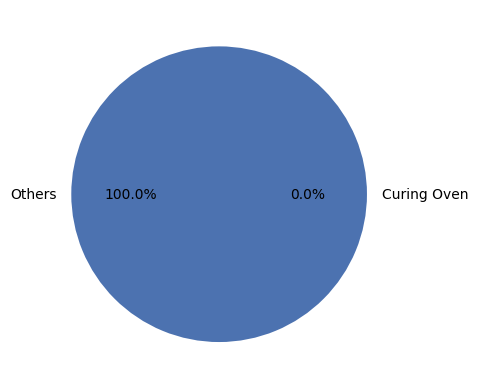

In [48]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5)
df2 = [grouped.times.sum(), grouped.loc[grouped['Plant'] == 'CO_Curingoven', 'times'].sum()]
colors = sns.color_palette('deep')[0:5]
plt.pie(df2, colors=colors, labels=['Others', 'Curing Oven'], autopct='%1.1f%%')

plt.show()

In [49]:
#Creating a dataset with the components and which alarms refers to
grouped = df.groupby(['Component', 'MsgNr'])['Component'].count()
grouped = grouped.to_frame().rename(columns={'Component': 'times'}).reset_index()
grouped

,Component,MsgNr,times
0,.10-62.2U6,15233,2982
1,.10-62.2U6,15234,2986
2,.10-63.21U8,8269,2899
3,.10-63.27A3,23325,7927
4,10-61.47Y6,33316,5385
5,4-2. 4A2,27080,9596
6,4-2. 4A2,27088,9510
7,4-2.103S1,27281,17980
8,4-2.104A2,27258,8988
9,4-2.114S2,27262,8668


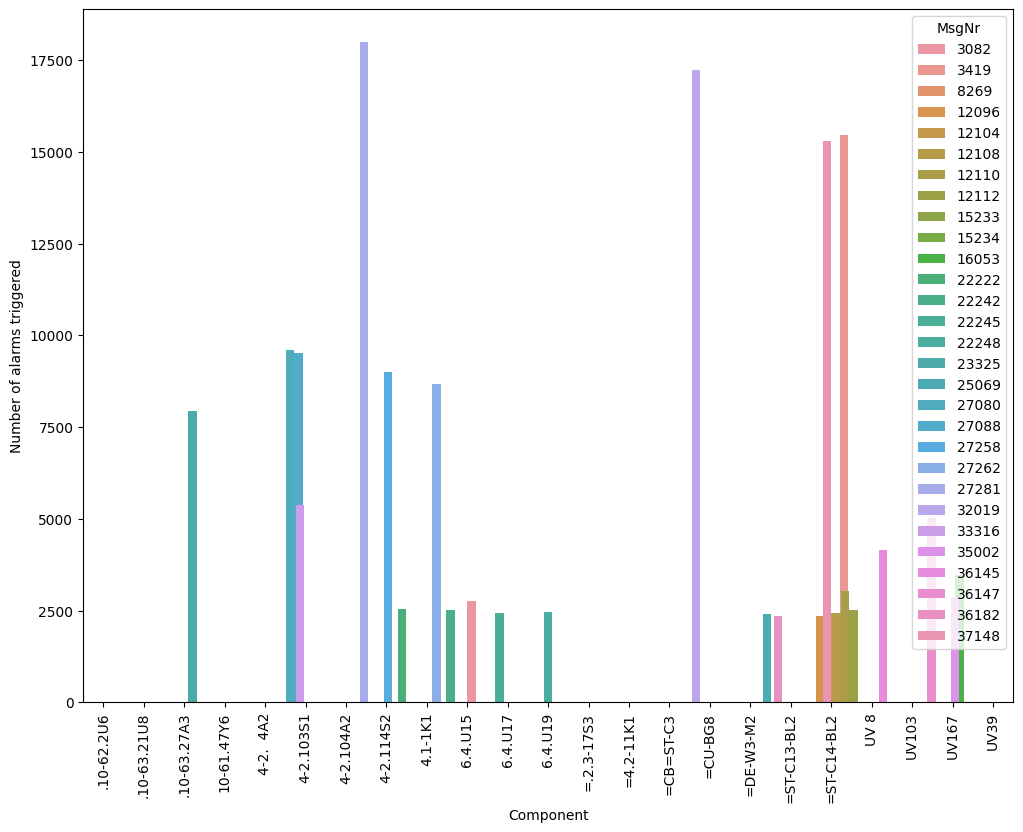

In [50]:
fig, ax = plt.subplots(figsize = (12,9))
s = sns.barplot(data=grouped, x='Component', y='times', hue='MsgNr', dodge='False', width=6)
s.tick_params(axis='x', labelrotation=90)
s.set_ylabel('Number of alarms triggered')
plt.show()

## Sets of alarms

In [51]:
#make the dataset datetime-index based
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace = True)
df

C:\Users\manda\AppData\Local\Temp\ipykernel_2732\2302389404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateTime'] = pd.to_datetime(df['DateTime'])


,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,Plant,Component,...,weekday,Total_alarms_of_date,alarms_by_date_bins,good_bad_outlier,is_valid,is_weekend,Area,Response,Year-Month,Year-Week
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 05:21:45,2022-01-03 05:20:00,6,2022-01-03,294,36182,910,1,0,Briquette_B1,=CB=ST-C3,...,0,2680,2000,good_day,valid,is_weekday,NaN,Unacknowledged or Fleeting,2022-01,2022-01
2022-01-03 05:28:20,2022-01-03 05:20:00,6,2022-01-03,294,36145,919,1,0,Briquette_B1,=ST-C13-BL2,...,0,2680,2000,good_day,valid,is_weekday,NaN,Unacknowledged or Fleeting,2022-01,2022-01
2022-01-03 05:28:42,2022-01-03 05:20:00,6,2022-01-03,294,36145,919,1,0,Briquette_B1,=ST-C13-BL2,...,0,2680,2000,good_day,valid,is_weekday,NaN,Acknowledged,2022-01,2022-01
2022-01-03 05:30:00,2022-01-03 05:30:00,37,2022-01-03,294,36145,920,1,0,Briquette_B1,=ST-C13-BL2,...,0,2680,2000,good_day,valid,is_weekday,NaN,Unacknowledged or Fleeting,2022-01,2022-01
2022-01-03 05:30:15,2022-01-03 05:30:00,37,2022-01-03,294,36145,919,1,0,Briquette_B1,=ST-C13-BL2,...,0,2680,2000,good_day,valid,is_weekday,NaN,Unacknowledged or Fleeting,2022-01,2022-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 23:34:27,2023-01-31 23:30:00,16,2023-01-31,339,31326,524,1,0,Granulat,NaN,...,1,2009,2000,good_day,valid,is_weekday,NaN,Unacknowledged or Fleeting,2023-01,2023-05
2023-01-31 23:42:35,2023-01-31 23:40:00,14,2023-01-31,339,31326,689,1,0,Granulat,NaN,...,1,2009,2000,good_day,valid,is_weekday,NaN,Unacknowledged or Fleeting,2023-01,2023-05
2023-01-31 23:43:09,2023-01-31 23:40:00,14,2023-01-31,339,31064,690,1,0,Granulat,NaN,...,1,2009,2000,good_day,valid,is_weekday,NaN,Unacknowledged or Fleeting,2023-01,2023-05


In [52]:
#calculate the difference in seconds between events and agrgegate them into groups
df = df.copy()
df['seconds_diff'] = df.index.to_series().diff().dt.total_seconds()
df['dependence_bigger10min'] = df['seconds_diff'].apply(lambda s: 0 if s<=600 else 1)
df['dependence_5-10min'] = df['seconds_diff'].apply(lambda s: 1 if s<600 and s>=300 else 0)
df['dependence_1-5min'] = df['seconds_diff'].apply(lambda s: 1 if s<300 and s>60 else 0)
df['dependence_1min'] = df['seconds_diff'].apply(lambda s: 0 if s<=60 else 1)
df.head()

,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,Plant,Component,...,is_weekend,Area,Response,Year-Month,Year-Week,seconds_diff,dependence_bigger10min,dependence_5-10min,dependence_1-5min,dependence_1min
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 05:21:45,2022-01-03 05:20:00,6,2022-01-03,294,36182,910,1,0,Briquette_B1,=CB=ST-C3,...,is_weekday,NaN,Unacknowledged or Fleeting,2022-01,2022-01,NaN,1,0,0,1
2022-01-03 05:28:20,2022-01-03 05:20:00,6,2022-01-03,294,36145,919,1,0,Briquette_B1,=ST-C13-BL2,...,is_weekday,NaN,Unacknowledged or Fleeting,2022-01,2022-01,395.0,0,1,0,1
2022-01-03 05:28:42,2022-01-03 05:20:00,6,2022-01-03,294,36145,919,1,0,Briquette_B1,=ST-C13-BL2,...,is_weekday,NaN,Acknowledged,2022-01,2022-01,22.0,0,0,0,0
2022-01-03 05:30:00,2022-01-03 05:30:00,37,2022-01-03,294,36145,920,1,0,Briquette_B1,=ST-C13-BL2,...,is_weekday,NaN,Unacknowledged or Fleeting,2022-01,2022-01,78.0,0,0,1,1
2022-01-03 05:30:15,2022-01-03 05:30:00,37,2022-01-03,294,36145,919,1,0,Briquette_B1,=ST-C13-BL2,...,is_weekday,NaN,Unacknowledged or Fleeting,2022-01,2022-01,15.0,0,0,0,0


In [53]:
# Count number of occurences per condition
df[['dependence_bigger10min','dependence_5-10min','dependence_1-5min','dependence_1min']].sum()

dependence_bigger10min    12177
dependence_5-10min        15103
dependence_1-5min         50077
dependence_1min           77381
dtype: int64

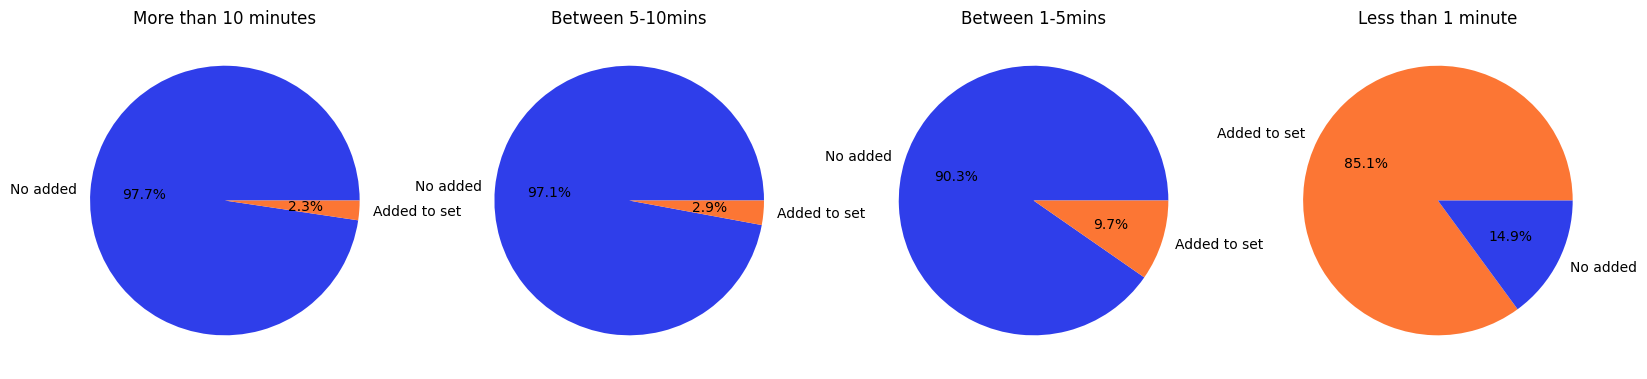

In [54]:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5))
colors = ['#2F3EEA', '#FC7634']
new_colors = colors[::-1]

ax1.pie(df['dependence_bigger10min'].value_counts(), colors=colors, labels=['No added', 'Added to set'], autopct='%1.1f%%')
ax1.set_title('More than 10 minutes')

ax2.pie(df['dependence_5-10min'].value_counts(), colors=colors, labels=['No added', 'Added to set'], autopct='%1.1f%%')
ax2.set_title('Between 5-10mins')

ax3.pie(df['dependence_1-5min'].value_counts(), colors=colors, labels=['No added', 'Added to set'], autopct='%1.1f%%')
ax3.set_title('Between 1-5mins')

colors = [colors[1], colors[0]]
ax4.pie(df['dependence_1min'].value_counts(), colors=colors, labels=['Added to set', 'No added'], autopct='%1.1f%%')
ax4.set_title('Less than 1 minute')

plt.show()


In [55]:
# Creating a column which ennumerates and increases the number of sets
df['inverted'] = df.dependence_1min.shift()
df['output'] = 0
df.loc[df.dependence_1min==0, 'output'] = df[df.dependence_1min==0].inverted.cumsum()
df.head()

,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,Plant,Component,...,Response,Year-Month,Year-Week,seconds_diff,dependence_bigger10min,dependence_5-10min,dependence_1-5min,dependence_1min,inverted,output
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 05:21:45,2022-01-03 05:20:00,6,2022-01-03,294,36182,910,1,0,Briquette_B1,=CB=ST-C3,...,Unacknowledged or Fleeting,2022-01,2022-01,NaN,1,0,0,1,NaN,0
2022-01-03 05:28:20,2022-01-03 05:20:00,6,2022-01-03,294,36145,919,1,0,Briquette_B1,=ST-C13-BL2,...,Unacknowledged or Fleeting,2022-01,2022-01,395.0,0,1,0,1,1.0,0
2022-01-03 05:28:42,2022-01-03 05:20:00,6,2022-01-03,294,36145,919,1,0,Briquette_B1,=ST-C13-BL2,...,Acknowledged,2022-01,2022-01,22.0,0,0,0,0,1.0,1
2022-01-03 05:30:00,2022-01-03 05:30:00,37,2022-01-03,294,36145,920,1,0,Briquette_B1,=ST-C13-BL2,...,Unacknowledged or Fleeting,2022-01,2022-01,78.0,0,0,1,1,0.0,0
2022-01-03 05:30:15,2022-01-03 05:30:00,37,2022-01-03,294,36145,919,1,0,Briquette_B1,=ST-C13-BL2,...,Unacknowledged or Fleeting,2022-01,2022-01,15.0,0,0,0,0,1.0,2


In [56]:
df.reset_index(inplace=True)  # Reset the index
df['new_output'] = df['output'].shift(-1)
df['sequences'] = df['output']
df.loc[df['new_output'] >= df['output'], 'sequences'] = df['new_output']
df[:30]

,DateTime,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,Plant,...,Year-Week,seconds_diff,dependence_bigger10min,dependence_5-10min,dependence_1-5min,dependence_1min,inverted,output,new_output,sequences
0,2022-01-03 05:21:45,2022-01-03 05:20:00,6,2022-01-03,294,36182,910,1,0,Briquette_B1,...,2022-01,NaN,1,0,0,1,NaN,0,0.0,0
1,2022-01-03 05:28:20,2022-01-03 05:20:00,6,2022-01-03,294,36145,919,1,0,Briquette_B1,...,2022-01,395.0,0,1,0,1,1.0,0,1.0,1
2,2022-01-03 05:28:42,2022-01-03 05:20:00,6,2022-01-03,294,36145,919,1,0,Briquette_B1,...,2022-01,22.0,0,0,0,0,1.0,1,0.0,1
3,2022-01-03 05:30:00,2022-01-03 05:30:00,37,2022-01-03,294,36145,920,1,0,Briquette_B1,...,2022-01,78.0,0,0,1,1,0.0,0,2.0,2
4,2022-01-03 05:30:15,2022-01-03 05:30:00,37,2022-01-03,294,36145,919,1,0,Briquette_B1,...,2022-01,15.0,0,0,0,0,1.0,2,2.0,2
5,2022-01-03 05:30:28,2022-01-03 05:30:00,37,2022-01-03,294,36145,919,1,0,Briquette_B1,...,2022-01,13.0,0,0,0,0,0.0,2,2.0,2
6,2022-01-03 05:30:59,2022-01-03 05:30:00,37,2022-01-03,294,36145,921,1,0,Briquette_B1,...,2022-01,31.0,0,0,0,0,0.0,2,2.0,2
7,2022-01-03 05:31:34,2022-01-03 05:30:00,37,2022-01-03,294,36145,920,1,0,Briquette_B1,...,2022-01,35.0,0,0,0,0,0.0,2,2.0,2
8,2022-01-03 05:31:42,2022-01-03 05:30:00,37,2022-01-03,294,36145,921,1,0,Briquette_B1,...,2022-01,8.0,0,0,0,0,0.0,2,2.0,2
9,2022-01-03 05:31:54,2022-01-03 05:30:00,37,2022-01-03,294,36145,921,1,0,Briquette_B1,...,2022-01,12.0,0,0,0,0,0.0,2,2.0,2


In [57]:
print(f'number of sets of alarms identified {int(df.output.max())}')

number of sets of alarms identified 50415


In [58]:
# How many occurences there are per block of alarms
grouped = df.groupby(['output'])['output'].count()
grouped = grouped.to_frame().drop(0).rename(columns={'output': 'occurrences'}).sort_values(by=['occurrences'])
grouped

,occurrences
output,
1,1
28374,1
28373,1
28372,1
28371,1
...,...
6016,710
49822,784
46588,1116


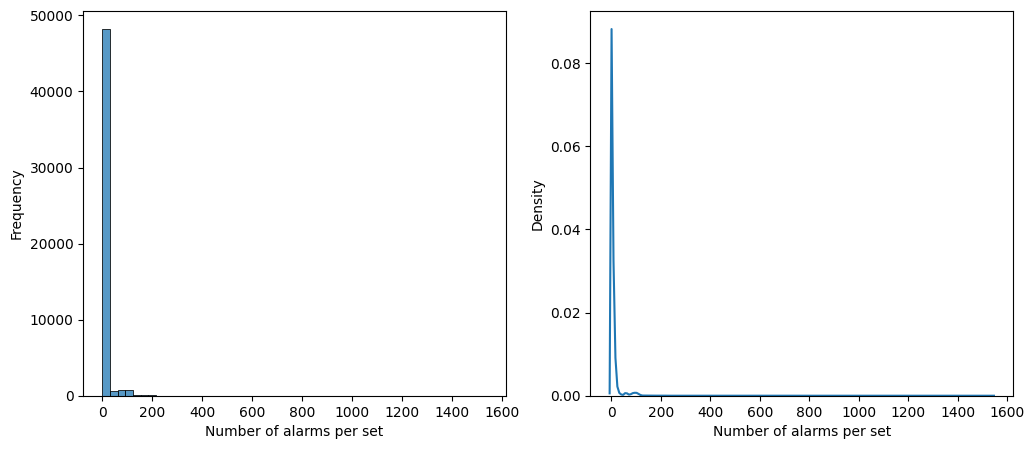

In [59]:
#Sets of alarms distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(grouped['occurrences'], bins=50, ax=ax1)
ax1.set_xlabel('Number of alarms per set')
ax1.set_ylabel('Frequency')

sns.kdeplot(grouped['occurrences'], ax=ax2)
ax2.set_xlabel('Number of alarms per set')

plt.show()


In [60]:
# Taking quantile 95 data
grouped = grouped[grouped.occurrences< grouped.quantile(q=0.95).occurrences]
grouped.shape


(47849, 1)

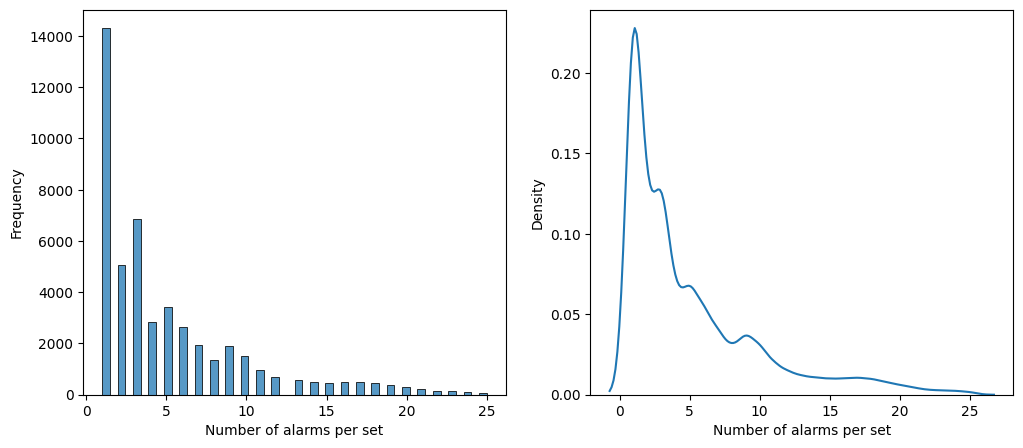

In [61]:
# Plot quantile 95 data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(grouped['occurrences'], bins=50, ax=ax1)
ax1.set_xlabel('Number of alarms per set')
ax1.set_ylabel('Frequency')

sns.kdeplot(grouped['occurrences'], ax=ax2)
ax2.set_xlabel('Number of alarms per set')

plt.show()

In [128]:
df_bck = df.copy()

## Alarms and warnings and messages classification


In [2]:
df = pd.read_csv('./dataframes/clean_data.csv')

In [85]:
#current number of alarms
df.shape

(400001, 42)

In [98]:
#Two alarms within the same component are selected
# grouped = df[['Text',"MsgNr","Type"]].loc[df['MsgNr'].isin([11225, 11226])]
grouped = df[['Text',"MsgNr","Type", "Component", "Plant"]].loc[df['MsgNr'].isin([6280])]
grouped

,Text,MsgNr,Type,Component,Plant


In [5]:
grouped = grouped.groupby(['MsgNr', 'Type'])['MsgNr'].count()
grouped_filtered_df = pd.DataFrame(grouped).rename(columns={'MsgNr':'Number of events triggered'}).reset_index()
grouped_filtered_df


,MsgNr,Type,Number of events triggered
0,11225,Alarm,3340
1,11225,Warning,18275
2,11226,Alarm,17271


In [96]:
grouped.Text.unique()

array(['StÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â¶rung Sektion Transport Linie 1',
       'StÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â¶rung Sektion Transport Linie 1',
       'Störung Sektion Transport Linie 1',
       'StÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â¶rung Sektion Transport Linie 1',
       'StÃ\x83Â\x83Ã\x82Â¶rung Sektion Transport Linie 1',
       'StÃ\x83Â¶rung Sektion Transport Linie 1'], dtype=object)

In [8]:
# Grouping on how many alarms belong to the different types
grouped_filtered = grouped[grouped.index.get_level_values('MsgNr').isin([11225, 11226])]
grouped_filtered_df = pd.DataFrame(grouped_filtered).rename(columns={'MsgNr':'Number of events triggered'}).reset_index()
grouped_filtered_df

,MsgNr,Type,Number of events triggered
0,11225,Alarm,3340
1,11225,Warning,18275
2,11226,Alarm,17271


<Axes: xlabel='MsgNr', ylabel='Number of events triggered'>

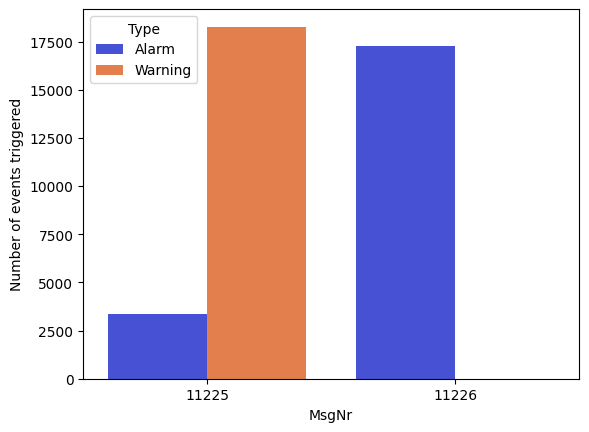

In [9]:
sns.barplot(data=grouped_filtered_df, x='MsgNr', y='Number of events triggered', hue='Type', palette = ['#2F3EEA', '#FC7634'])

In [63]:
#checking how many observatipons are there per type
df_type = df.groupby(['Type'])['Type'].count()
df_type = pd.DataFrame(df_type)
df_type.head()

,Type
Type,
Alarm,400001
Message,53958
Warning,64390


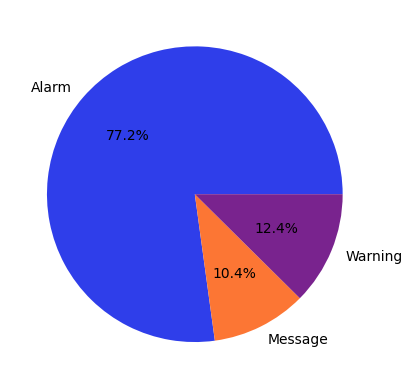

In [64]:
colors = sns.color_palette('deep')[0:5]
plt.pie(df_type['Type'], colors=['#2F3EEA', '#FC7634', '#79238E'], labels=['Alarm', 'Message','Warning'], autopct='%1.1f%%')
plt.show()

In [12]:
df_bck = df.copy()

In [65]:
#all unique alarms an occurences, taking into account alarms, warnings and messages
df_complete = pd.DataFrame(df.groupby(['MsgNr'])['MsgNr'].count()).rename(columns={'MsgNr': 'occurrences'})

In [66]:
df = df[df['Type']== 'Alarm']

In [67]:
df.shape

(400001, 42)

In [68]:
#all unique alarms an occurences, taking into account just alarms
df_alarms = pd.DataFrame(df.groupby(['MsgNr'])['MsgNr'].count()).rename(columns={'MsgNr': 'occurrences'})

## Chattering alarms

In [69]:
data = df[['DateTime', 'MsgNr', 'Component', 'Plant']]
data.head()

,DateTime,MsgNr,Component,Plant
0,2022-01-03 05:21:45,36182,=CB=ST-C3,Briquette_B1
1,2022-01-03 05:28:20,36145,=ST-C13-BL2,Briquette_B1
2,2022-01-03 05:28:42,36145,=ST-C13-BL2,Briquette_B1
3,2022-01-03 05:30:00,36145,=ST-C13-BL2,Briquette_B1
4,2022-01-03 05:30:15,36145,=ST-C13-BL2,Briquette_B1


In [70]:
#Aggregating time difference between the SAME alarm event
data = data.copy()
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['time_diff'] = data.groupby('MsgNr')['DateTime'].diff()
data[:10]

,DateTime,MsgNr,Component,Plant,time_diff
0,2022-01-03 05:21:45,36182,=CB=ST-C3,Briquette_B1,NaT
1,2022-01-03 05:28:20,36145,=ST-C13-BL2,Briquette_B1,NaT
2,2022-01-03 05:28:42,36145,=ST-C13-BL2,Briquette_B1,0 days 00:00:22
3,2022-01-03 05:30:00,36145,=ST-C13-BL2,Briquette_B1,0 days 00:01:18
4,2022-01-03 05:30:15,36145,=ST-C13-BL2,Briquette_B1,0 days 00:00:15
5,2022-01-03 05:30:28,36145,=ST-C13-BL2,Briquette_B1,0 days 00:00:13
6,2022-01-03 05:30:59,36145,=ST-C13-BL2,Briquette_B1,0 days 00:00:31
7,2022-01-03 05:31:34,36145,=ST-C13-BL2,Briquette_B1,0 days 00:00:35
8,2022-01-03 05:31:42,36145,=ST-C13-BL2,Briquette_B1,0 days 00:00:08
9,2022-01-03 05:31:54,36145,=ST-C13-BL2,Briquette_B1,0 days 00:00:12


In [71]:
data_bck = data.copy()

In [72]:
# If one alarm is repeated within the same minute, just take 1 value
data = data[pd.isna(data['time_diff']) | (data['time_diff'] > pd.Timedelta(minutes=1))]
data

,DateTime,MsgNr,Component,Plant,time_diff
0,2022-01-03 05:21:45,36182,=CB=ST-C3,Briquette_B1,NaT
1,2022-01-03 05:28:20,36145,=ST-C13-BL2,Briquette_B1,NaT
3,2022-01-03 05:30:00,36145,=ST-C13-BL2,Briquette_B1,0 days 00:01:18
44,2022-01-03 05:49:33,31359,NaN,Granulat,NaT
45,2022-01-03 05:49:33,31352,NaN,Granulat,NaT
...,...,...,...,...,...
518332,2023-01-31 23:22:02,32032,NaN,HaRo,0 days 03:13:40
518338,2023-01-31 23:31:26,27258,4-2.104A2,Tensiontech,0 days 00:09:47
518346,2023-01-31 23:43:09,31064,NaN,Granulat,0 days 00:28:32
518347,2023-01-31 23:43:09,31080,NaN,Granulat,0 days 00:28:32


In [73]:
df_chattering = pd.DataFrame(data.groupby(['MsgNr'])['MsgNr'].count()).rename(columns={'MsgNr': 'occurrences'})

In [74]:
data['time_diff_plant'] = data.groupby('Plant')['DateTime'].diff()
data[:10]

,DateTime,MsgNr,Component,Plant,time_diff,time_diff_plant
0,2022-01-03 05:21:45,36182,=CB=ST-C3,Briquette_B1,NaT,NaT
1,2022-01-03 05:28:20,36145,=ST-C13-BL2,Briquette_B1,NaT,0 days 00:06:35
3,2022-01-03 05:30:00,36145,=ST-C13-BL2,Briquette_B1,0 days 00:01:18,0 days 00:01:40
44,2022-01-03 05:49:33,31359,NaN,Granulat,NaT,NaT
45,2022-01-03 05:49:33,31352,NaN,Granulat,NaT,0 days 00:00:00
46,2022-01-03 05:49:33,31355,NaN,Granulat,NaT,0 days 00:00:00
47,2022-01-03 05:49:33,31358,NaN,Granulat,NaT,0 days 00:00:00
48,2022-01-03 05:49:33,31348,NaN,Granulat,NaT,0 days 00:00:00
49,2022-01-03 05:49:33,40038,NaN,Granulat Sack Palettierung,NaT,NaT
50,2022-01-03 05:49:33,31320,NaN,Granulat,NaT,0 days 00:00:00


In [75]:
data = data[pd.isna(data['time_diff']) | (data['time_diff_plant'] > pd.Timedelta(minutes=1))]
data

,DateTime,MsgNr,Component,Plant,time_diff,time_diff_plant
0,2022-01-03 05:21:45,36182,=CB=ST-C3,Briquette_B1,NaT,NaT
1,2022-01-03 05:28:20,36145,=ST-C13-BL2,Briquette_B1,NaT,0 days 00:06:35
3,2022-01-03 05:30:00,36145,=ST-C13-BL2,Briquette_B1,0 days 00:01:18,0 days 00:01:40
44,2022-01-03 05:49:33,31359,NaN,Granulat,NaT,NaT
45,2022-01-03 05:49:33,31352,NaN,Granulat,NaT,0 days 00:00:00
...,...,...,...,...,...,...
518329,2023-01-31 23:21:39,27258,4-2.104A2,Tensiontech,0 days 00:02:46,0 days 00:02:46
518332,2023-01-31 23:22:02,32032,NaN,HaRo,0 days 03:13:40,0 days 03:14:28
518338,2023-01-31 23:31:26,27258,4-2.104A2,Tensiontech,0 days 00:09:47,0 days 00:09:47
518346,2023-01-31 23:43:09,31064,NaN,Granulat,0 days 00:28:32,0 days 00:28:23


In [76]:
data_filtered = pd.DataFrame(data.groupby(['MsgNr'])['MsgNr'].count()).rename(columns={'MsgNr': 'occurrences'})

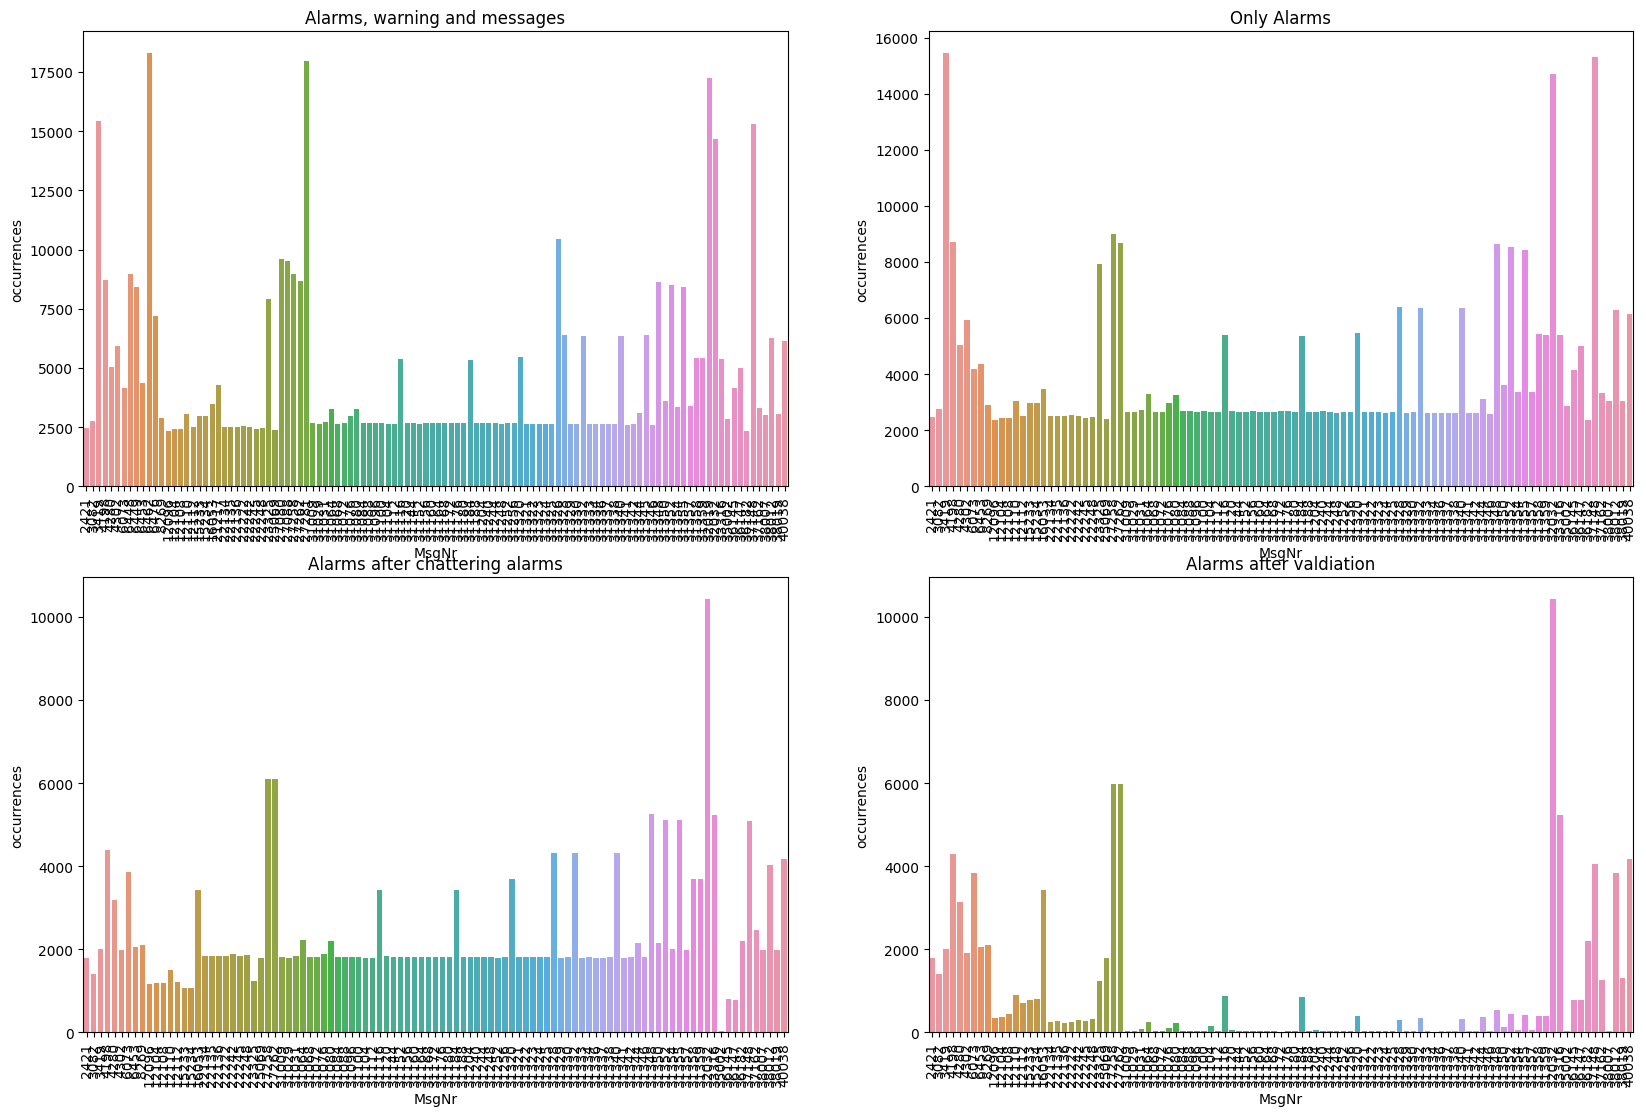

In [77]:
fig, axs = plt.subplots(ncols= 2, nrows =2, figsize=(20,13))

sns.barplot(data=df_complete, x=df_complete.index, y='occurrences', ax=axs[0,0])
axs[0,0].tick_params(axis='x', labelrotation=90)
axs[0,0].set_title("Alarms, warning and messages")

sns.barplot(data=df_alarms, x=df_alarms.index, y='occurrences', ax=axs[0,1])
axs[0,1].tick_params(axis='x', labelrotation=90)
axs[0,1].set_title("Only Alarms")

sns.barplot(data=df_chattering, x=df_chattering.index, y='occurrences', ax=axs[1,0])
axs[1,0].tick_params(axis='x', labelrotation=90)
axs[1,0].set_title("Alarms after chattering alarms")

sns.barplot(data=data_filtered, x=data_filtered.index, y='occurrences', ax=axs[1,1])
axs[1,1].tick_params(axis='x', labelrotation=90)
axs[1,1].set_title("Alarms after valdiation")

plt.show()

In [84]:
data_filtered.sort_values(by='occurrences', ascending=False)[:15]

,occurrences
MsgNr,
32032,10431
27258,5977
27262,5976
33316,5227
4198,4294
40038,4165
37148,4056
6073,3837
38012,3831


# New sets

In [32]:
#calculate the difference in seconds between events and agrgegate them into groups

data_bck = data.copy()


In [34]:
data.set_index('DateTime', inplace=True)

In [36]:
data['seconds_diff'] = data.index.to_series().diff().dt.total_seconds()
data['dependence'] = data['seconds_diff'].apply(lambda s: 0 if s<=60 else 1)

data.head()

C:\Users\manda\AppData\Local\Temp\ipykernel_18172\714271656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['seconds_diff'] = data.index.to_series().diff().dt.total_seconds()
C:\Users\manda\AppData\Local\Temp\ipykernel_18172\714271656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dependence'] = data['seconds_diff'].apply(lambda s: 0 if s<=60 else 1)


,MsgNr,Component,Plant,time_diff,time_diff_plant,seconds_diff,dependence
DateTime,,,,,,,
2022-01-03 09:17:48,9219,NaN,ACON/E-Welle,NaT,NaT,NaN,1
2022-01-03 09:28:03,49317,Kupolofen,BiMi-Lager,NaT,NaT,615.0,1
2022-01-03 09:36:43,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,NaT,NaT,520.0,1
2022-01-03 09:38:48,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,0 days 00:02:05,0 days 00:02:05,125.0,1
2022-01-03 09:39:18,49317,Kupolofen,BiMi-Lager,0 days 00:11:15,0 days 00:11:15,30.0,0


In [39]:
data['inverted'] = data.dependence.shift()
data['output'] = 0
data.loc[data.dependence==0, 'output'] = data[data.dependence==0].inverted.cumsum()
data.head()

C:\Users\manda\AppData\Local\Temp\ipykernel_18172\664869863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['inverted'] = data.dependence.shift()
C:\Users\manda\AppData\Local\Temp\ipykernel_18172\664869863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['output'] = 0


,MsgNr,Component,Plant,time_diff,time_diff_plant,seconds_diff,dependence,inverted,output
DateTime,,,,,,,,,
2022-01-03 09:17:48,9219,NaN,ACON/E-Welle,NaT,NaT,NaN,1,NaN,0
2022-01-03 09:28:03,49317,Kupolofen,BiMi-Lager,NaT,NaT,615.0,1,1.0,0
2022-01-03 09:36:43,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,NaT,NaT,520.0,1,1.0,0
2022-01-03 09:38:48,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,0 days 00:02:05,0 days 00:02:05,125.0,1,1.0,0
2022-01-03 09:39:18,49317,Kupolofen,BiMi-Lager,0 days 00:11:15,0 days 00:11:15,30.0,0,1.0,1


In [43]:
data.reset_index(inplace=True)
data['new_output'] = data['output'].shift(-1)
data['sequences'] = data['output']
data.loc[data['new_output'] >= data['output'], 'sequences'] = data['new_output']
data[:30]

C:\Users\manda\AppData\Local\Temp\ipykernel_18172\217981111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['new_output'] = data['output'].shift(-1)
C:\Users\manda\AppData\Local\Temp\ipykernel_18172\217981111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sequences'] = data['output']


,DateTime,MsgNr,Component,Plant,time_diff,time_diff_plant,seconds_diff,dependence,inverted,output,new_output,sequences
0,2022-01-03 09:17:48,9219,NaN,ACON/E-Welle,NaT,NaT,NaN,1,NaN,0,0.0,0
1,2022-01-03 09:28:03,49317,Kupolofen,BiMi-Lager,NaT,NaT,615.0,1,1.0,0,0.0,0
2,2022-01-03 09:36:43,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,NaT,NaT,520.0,1,1.0,0,0.0,0
3,2022-01-03 09:38:48,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,0 days 00:02:05,0 days 00:02:05,125.0,1,1.0,0,1.0,1
4,2022-01-03 09:39:18,49317,Kupolofen,BiMi-Lager,0 days 00:11:15,0 days 00:11:15,30.0,0,1.0,1,0.0,1
5,2022-01-03 09:53:36,49317,Kupolofen,BiMi-Lager,0 days 00:14:18,0 days 00:14:18,858.0,1,0.0,0,0.0,0
6,2022-01-03 10:00:21,18023,UV015,LiniensÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â...,NaT,NaT,405.0,1,1.0,0,0.0,0
7,2022-01-03 10:03:25,24324,.10-63.26A3,Abfallbeh. UV42,NaT,NaT,184.0,1,1.0,0,0.0,0
8,2022-01-03 10:10:01,9218,NaN,ACON/E-Welle,NaT,0 days 00:52:13,396.0,1,1.0,0,0.0,0
9,2022-01-03 10:11:28,9218,NaN,ACON/E-Welle,0 days 00:01:06,0 days 00:01:27,87.0,1,1.0,0,0.0,0


In [44]:
data = data[['DateTime', 'MsgNr', 'Component', 'Plant', 'sequences']]

In [194]:
df_bck.to_csv('./dataframes/clean_data.csv')

In [45]:
data.to_csv('./dataframes/clean_data_reduction.csv')

# Trial error

In [5]:
df = pd.read_csv('./dataframes/clean_data.csv')

In [10]:
df['Ms'].min()

0